# **NVIDIA Stock Price Analysis**
## **Objective:**
- The primary objective of this project is to further my understanding of NVIDIA as a company and a stock market investment. This can be done using the following:
- Use Deep Learning & Neural Networks (application of research).
- Perform an EDA on NVIDIA's stock price, and relate this to the real world. This could involve:
    - Trend Analysis
    - Volatility Analysis
    - Earnings Reports
    - Balance Sheet Health
    - Sector Trends
    - Competitive Position
    - Sentiment of Other Investors
- Perform a predictive analysis on NVIDIA's stock price.
    - Using RNNs and LSTMs
- Perform the analysis above with reference to NVIDIA's competitors
    - Namely, AMD, Intel and QualComm
    

### Installations:

In [20]:
%pip install pandas
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.



### Imports:

In [21]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import yfinance as yf

import keras
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import os 

In [22]:
keras.backend.set_image_data_format("channels_last")
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
yf.pdr_override()
%matplotlib inline

### Data Retreival & Cleaning:

In [23]:
# Retrieve 5 Years of NVIDIA's Stock Data
stocks = ['NVDA', 'AMD', 'INTC', 'QCOM']
data_list = []

# now = datetime.now()
now = datetime(year=2024, month=2, day=23)


for stock in stocks:
    df = yf.download(stock, now - relativedelta(years=5), now)
    df['Stock'] = stock
    data_list.append(df)

c_names = ["NVIDIA", "AMD", "INTEL", "QUALCOMM"]
colors = {
    "NVIDIA": "green",
    "INTEL": "#6fa8dc", 
    "AMD": "red",
    "QUALCOMM": "darkblue" 
}

for c_data, c_name in zip(data_list, c_names):
    c_data['Company Name'] = c_name

data = pd.concat(data_list, axis = 0)

# Descriptive Statistics & Information
print(data.describe())
print(data.info())

# Data Cleaning

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
              Open         High          Low        Close    Adj Close  \
count  5036.000000  5036.000000  5036.000000  5036.000000  5036.000000   
mean    110.467708   112.352098   108.562470   110.533628   108.175323   
std      93.540968    95.165698    91.827338    93.644872    94.059834   
min      21.350000    22.090000    21.040001    22.010000    22.010000   
25%      51.911251    52.575002    51.265000    51.939999    48.402832   
50%      86.364998    87.824997    84.814999    86.365002    83.125000   
75%     134.158745   136.133118   132.221874   133.979374   130.737812   
max     807.900024   823.940002   775.710022   788.169983   788.169983   

             Volume  
count  5.036000e+03  
mean   3.8665

### EDA of Stock Price

#### Data Visualisation

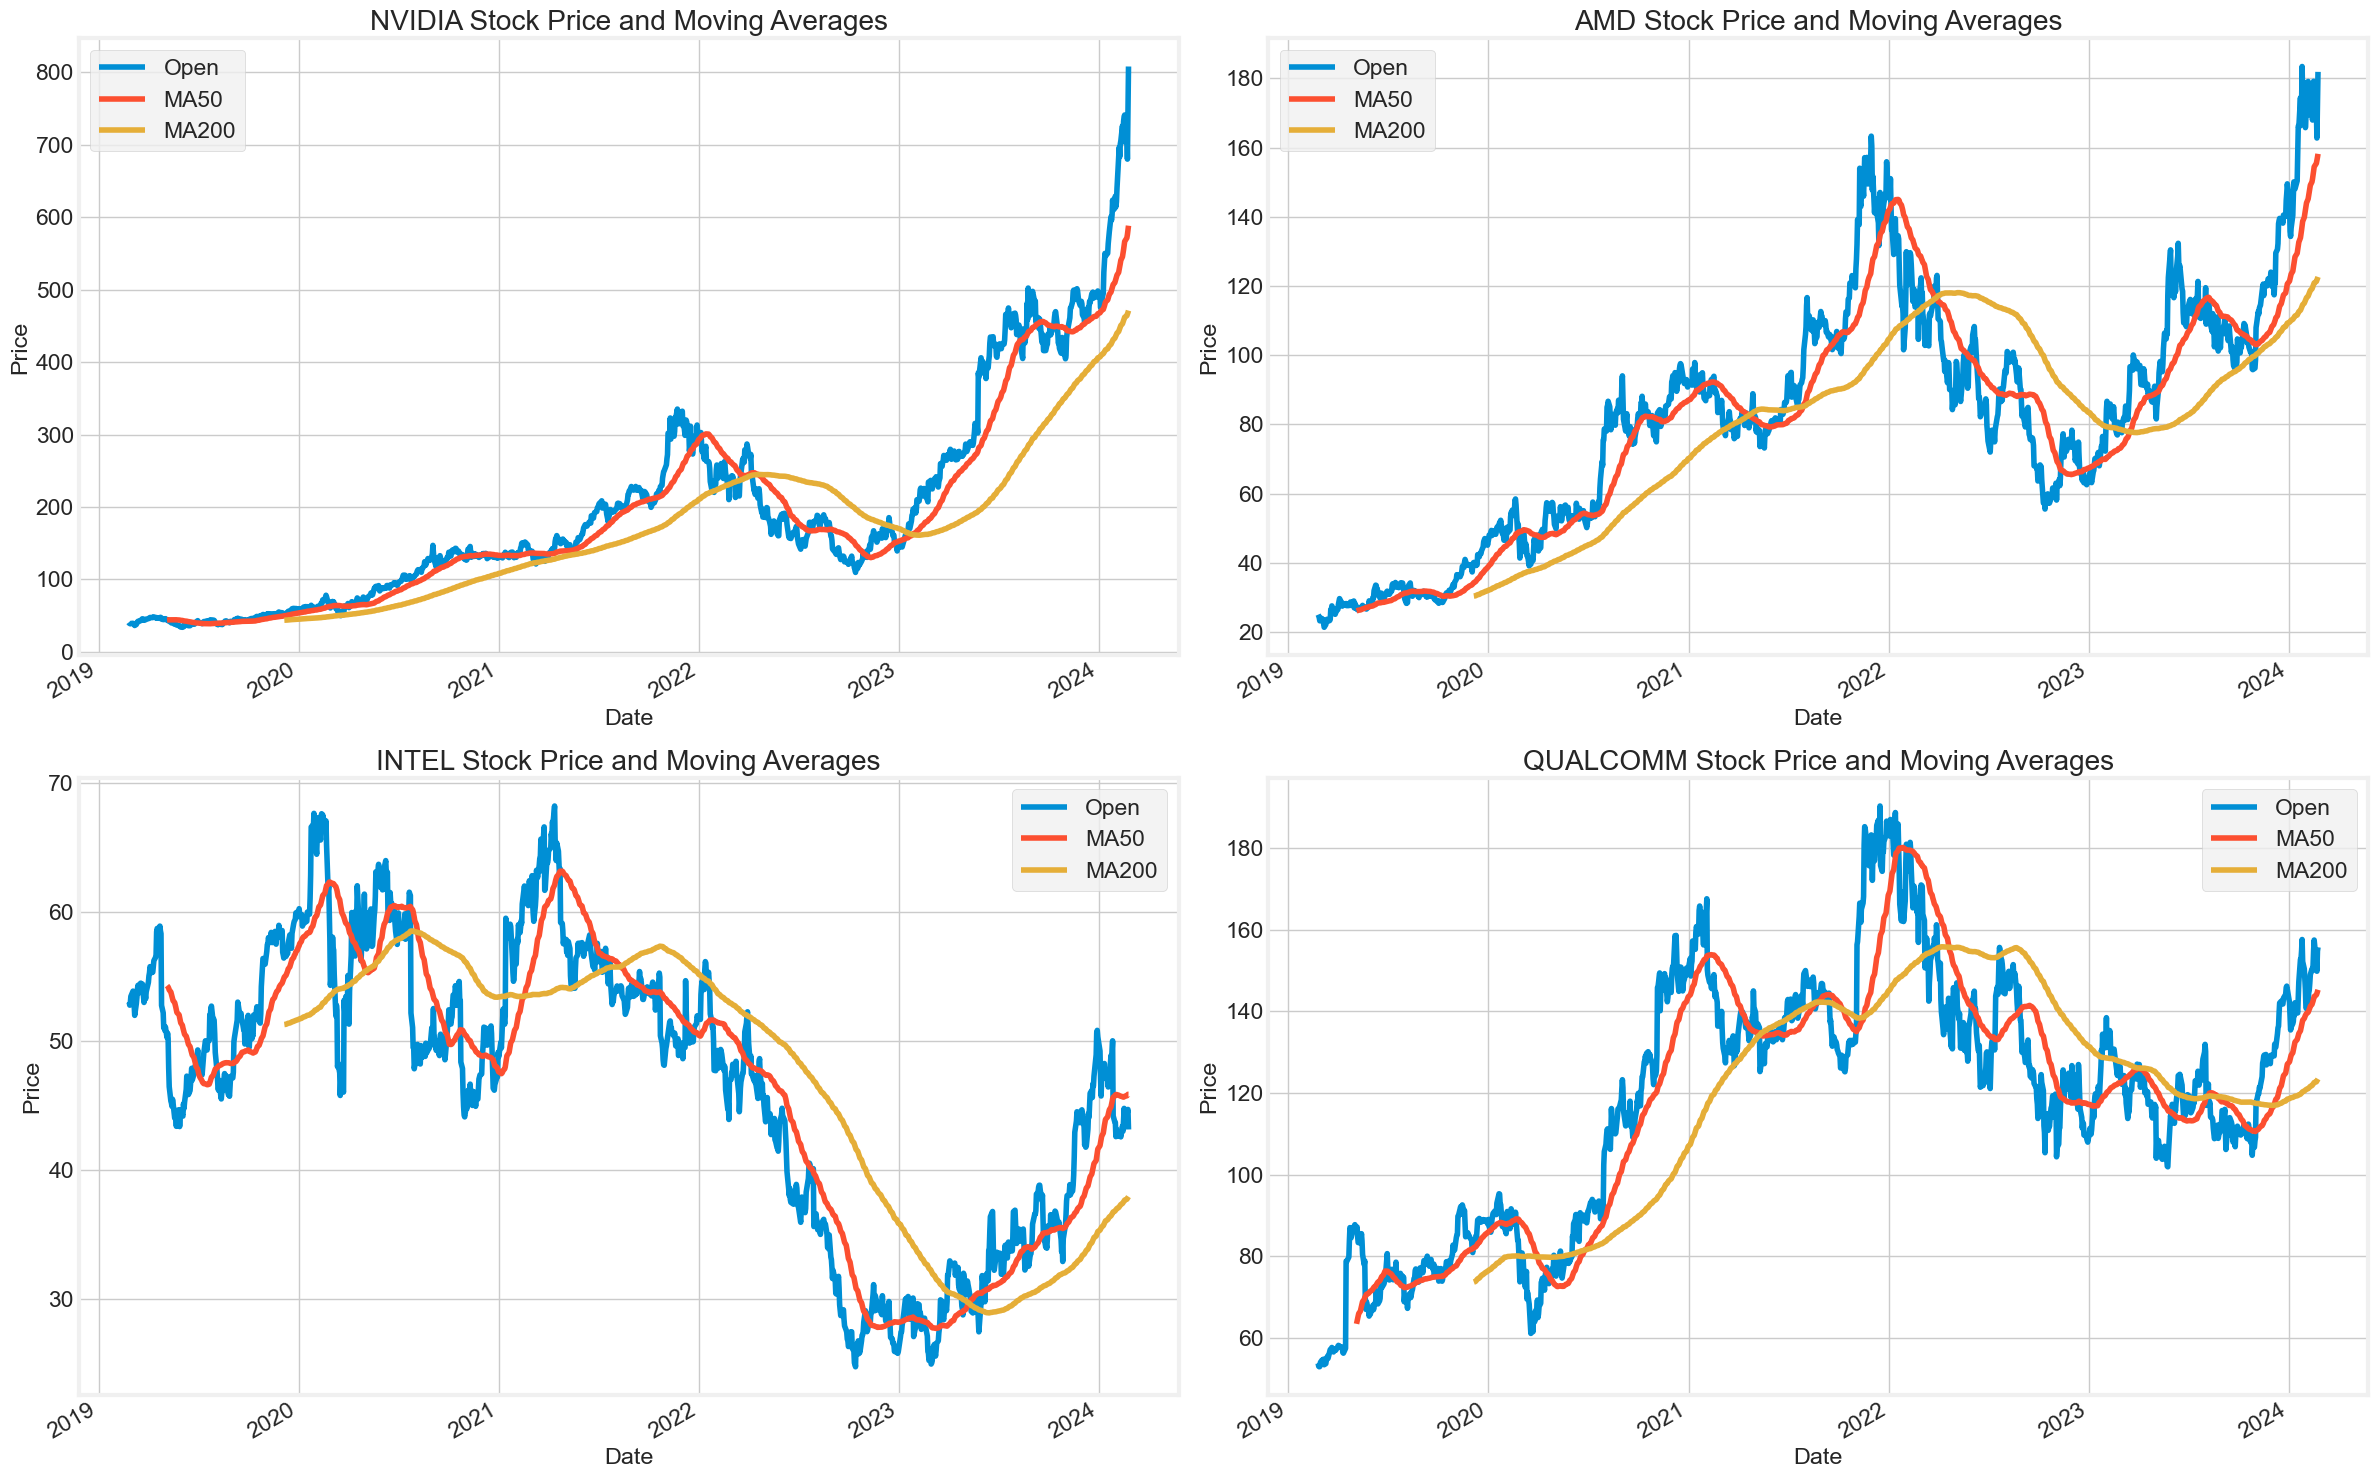

In [24]:
# Set up the matplotlib figure and axes for a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.set_facecolor('white')
axs = axs.flatten()

for i, (c_data, c_name) in enumerate(zip(data_list, c_names)):
    c_data['MA50'] = c_data['Open'].rolling(50).mean()
    c_data['MA200'] = c_data['Open'].rolling(200).mean()
    
    # Direct Pandas plot to use a specific Matplotlib subplot
    c_data[['Open', 'MA50', 'MA200']].plot(ax=axs[i], figsize=(24, 15), title=f"{c_name} Stock Price and Moving Averages")
    
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Price')
    axs[i].legend(["Open", "MA50", "MA200"])
    axs[i].set_facecolor('white')


plt.tight_layout()
plt.show()

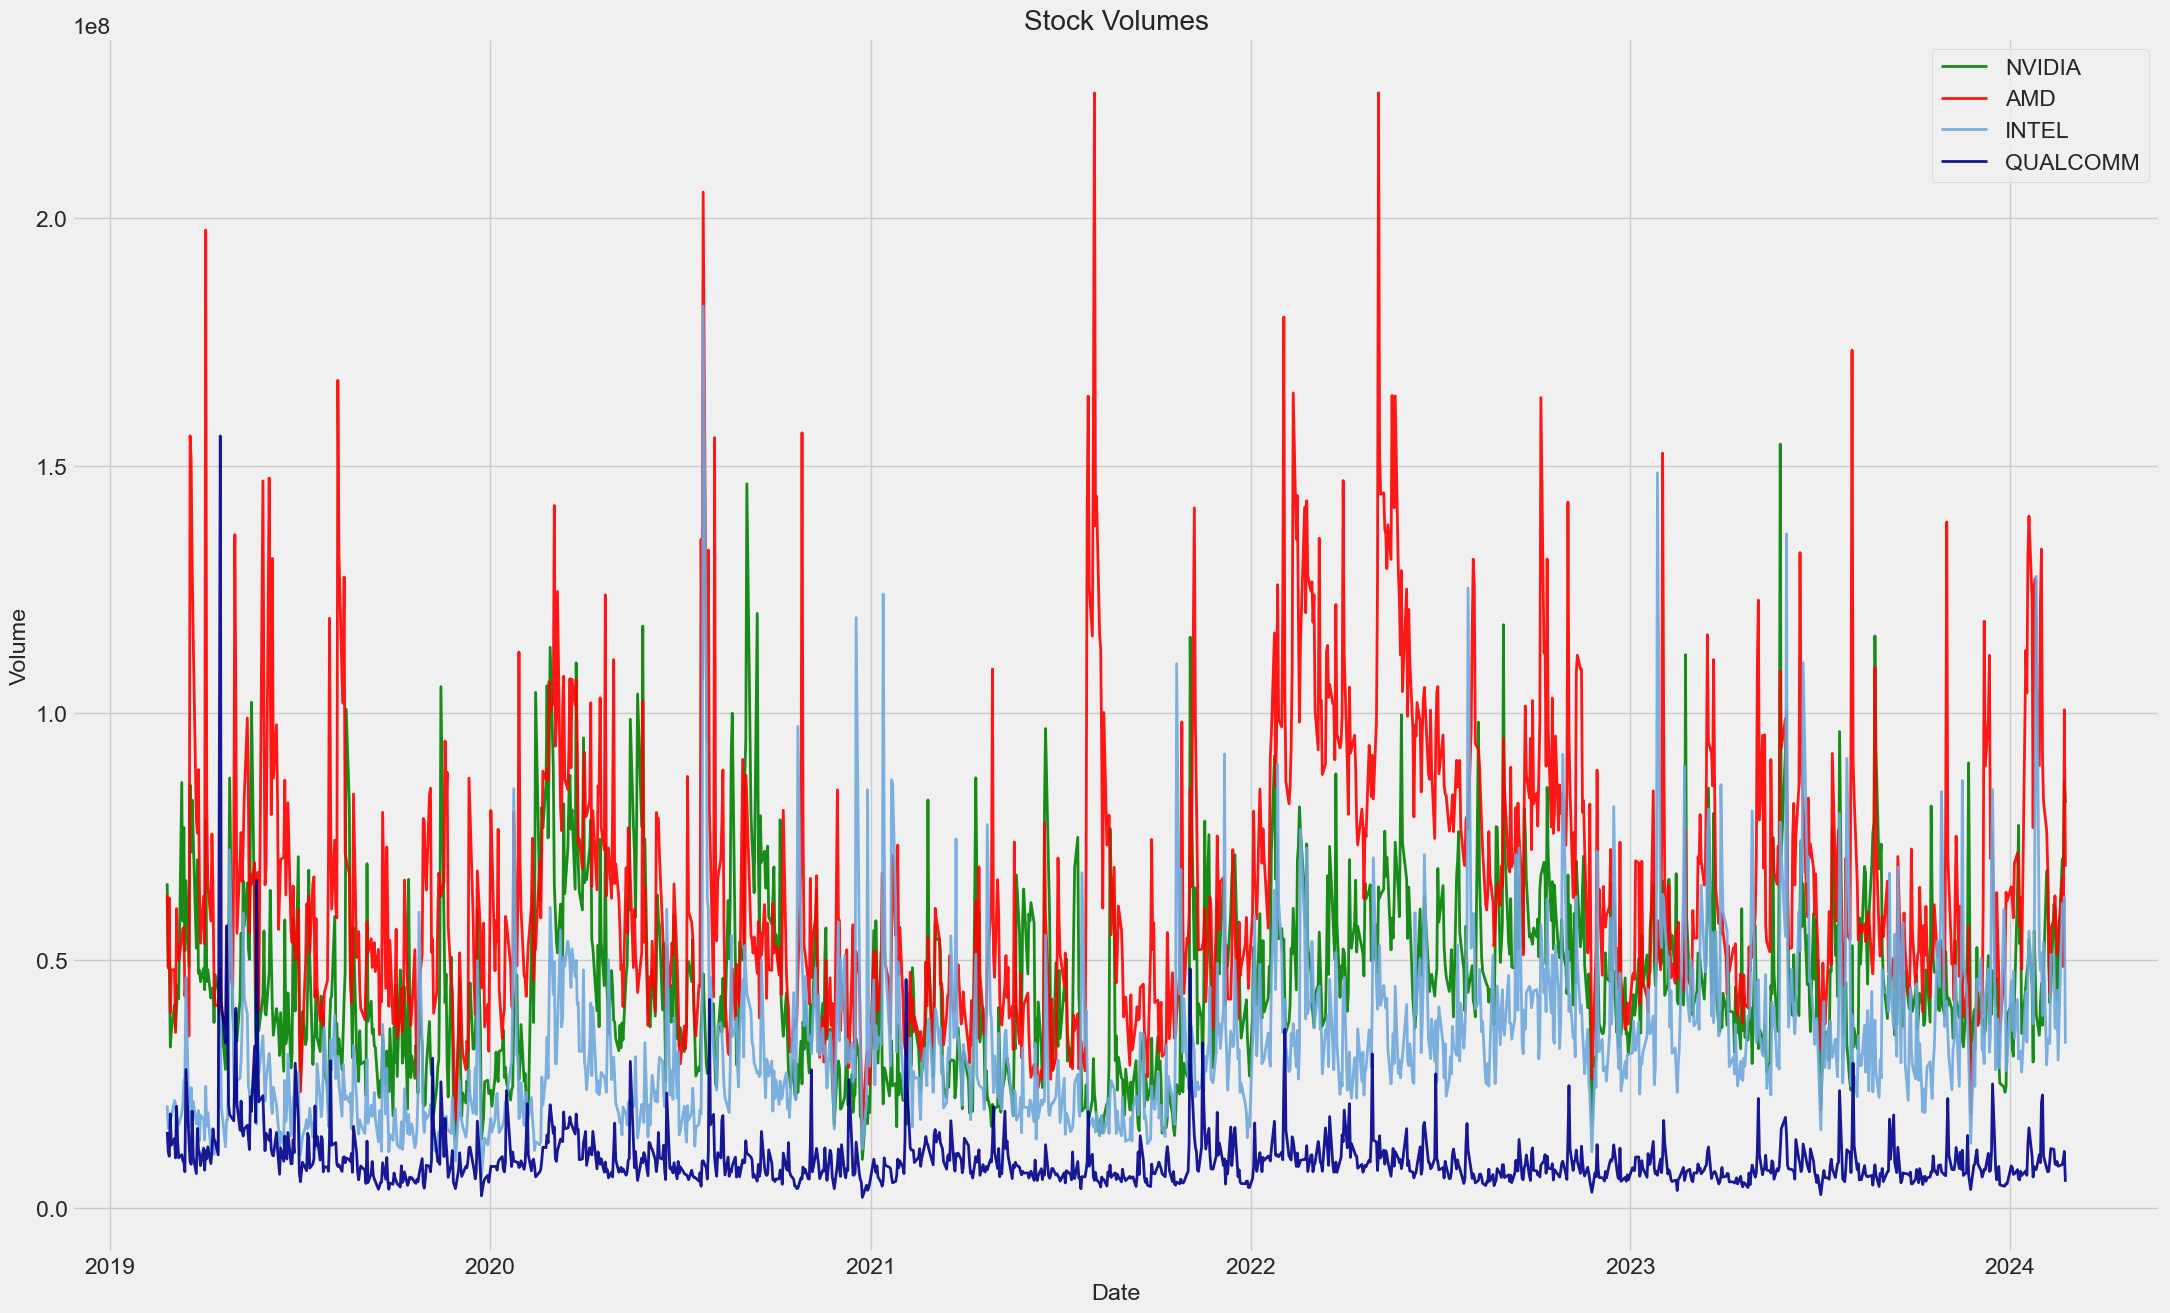

In [25]:
# Set the figure size and title
plt.figure(figsize=(24, 15))
plt.title("Stock Volumes")

# Filter and plot volume for each company
for c_name in c_names:
    # Filter the data for the current company
    company_data = data[data['Company Name'] == c_name]
    
    # Plot the volume data
    plt.plot(company_data.index, company_data['Volume'], label=c_name, color=colors[c_name], alpha=0.9, linewidth=2)

plt.legend(loc="best")
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

#### Annual Growth Rate

In [26]:
# Calculating Compound Annual Growth Rate
cagr_results = {}
n_years = 5  # The period over which we're calculating CAGR

for c_data, c_name in zip(data_list, c_names):
    # Extract the closing price at the beginning and end of the period
    beginning_value = c_data['Adj Close'].iloc[0]
    ending_value = c_data['Adj Close'].iloc[-1]
    
    # Calculate CAGR
    cagr = ((ending_value / beginning_value) ** (1 / n_years)) - 1
    cagr_results[c_name] = cagr

# Print the CAGR for each company
for company, cagr in cagr_results.items():
    print(f"{company}: {cagr*100:.2f}% annual growth rate")

NVIDIA: 82.10% annual growth rate
AMD: 48.18% annual growth rate
INTEL: -1.54% annual growth rate
QUALCOMM: 27.13% annual growth rate


In [27]:
for c_data, c_name in zip(data_list, c_names):
    beginning_value = c_data['Adj Close'].iloc[0]  # First adjusted close price
    ending_value = c_data['Adj Close'].iloc[-1]    # Last adjusted close price
    growth_5yr = 100 * ((ending_value - beginning_value) / beginning_value)

    print(f"Company: ${c_name}, Current: ${ending_value}, Start: ${beginning_value}, Growth: ${growth_5yr}")

Company: $NVIDIA, Current: $788.1699829101562, Start: $39.36434555053711, Growth: $1902.2433293048916
Company: $AMD, Current: $176.52000427246094, Start: $24.709999084472656, Growth: $614.3666969351816
Company: $INTEL, Current: $42.9900016784668, Start: $46.4683723449707, Growth: $-7.48545836871855
Company: $QUALCOMM, Current: $154.91000366210938, Start: $46.64170455932617, Growth: $232.12766369863425


#### Correlation

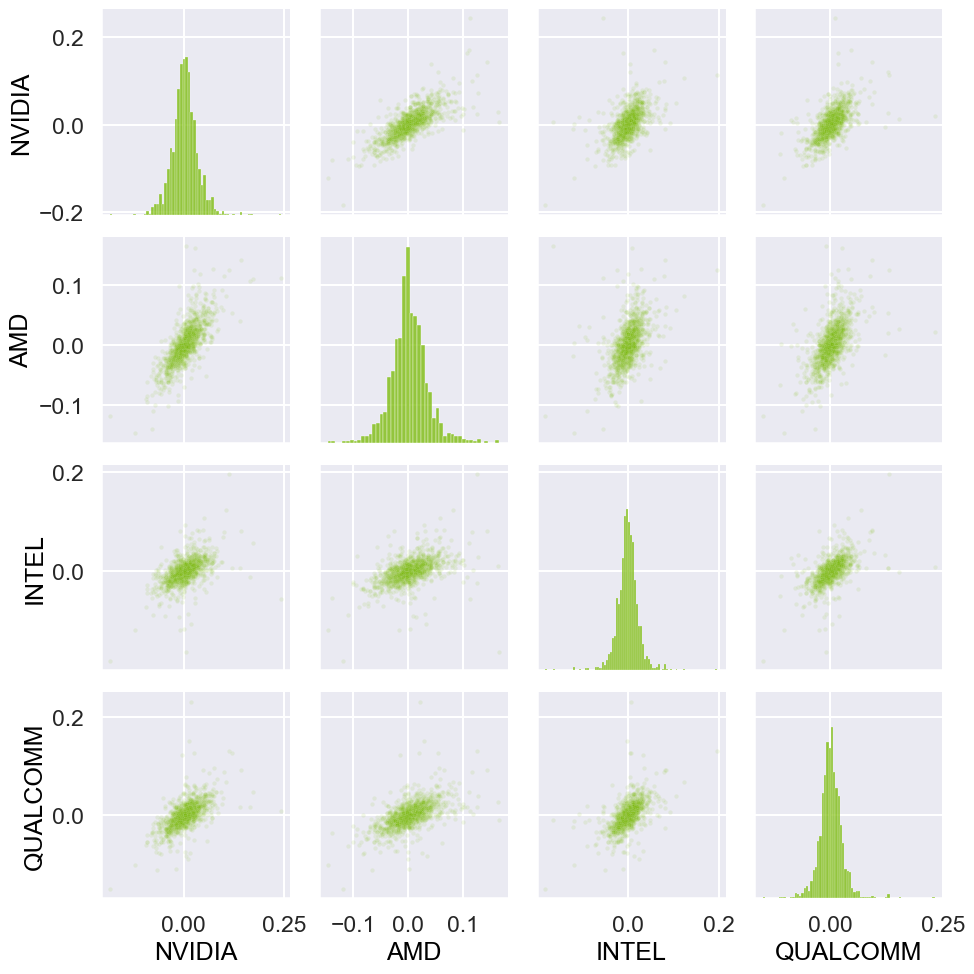

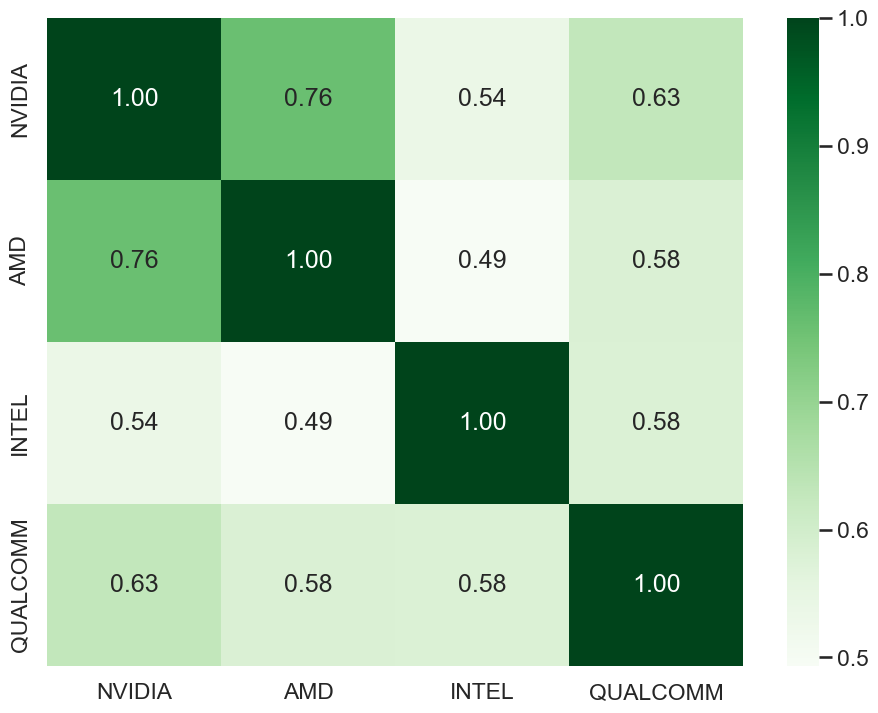

In [28]:
# Assuming data_list and c_names are defined and contain your data
# Select only the 'Adj Close' column for each stock
adj_closes = pd.DataFrame({c_name: c_data['Adj Close'] for c_data, c_name in zip(data_list, c_names)})

# Correlation as PairPlot
tech_rets = adj_closes.pct_change()
sns.set(rc={'figure.figsize':(12,12)})
sns.set_context('talk')
# Set the color for the scatter plots and the histogram to NVIDIA green-like color
pairplot = sns.pairplot(tech_rets, kind='scatter', diag_kind='hist', 
                        plot_kws={'alpha':0.1, 's':10, 'color':'#76b900'}, 
                        diag_kws={'color':'#76b900'})
sns.set_palette('deep')
sns.set_style('whitegrid', {'axes.grid': True})

# Change the color of all the text to black
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), color='black')
    ax.set_ylabel(ax.get_ylabel(), color='black')

plt.show()

# Correlation as Heatmap
corr_matrix = tech_rets.corr()
plt.figure(figsize=(10, 8))
# Change here: Use 'Greens' for the heatmap to have a green gradient
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.show()

#### Risk VS Expected Return

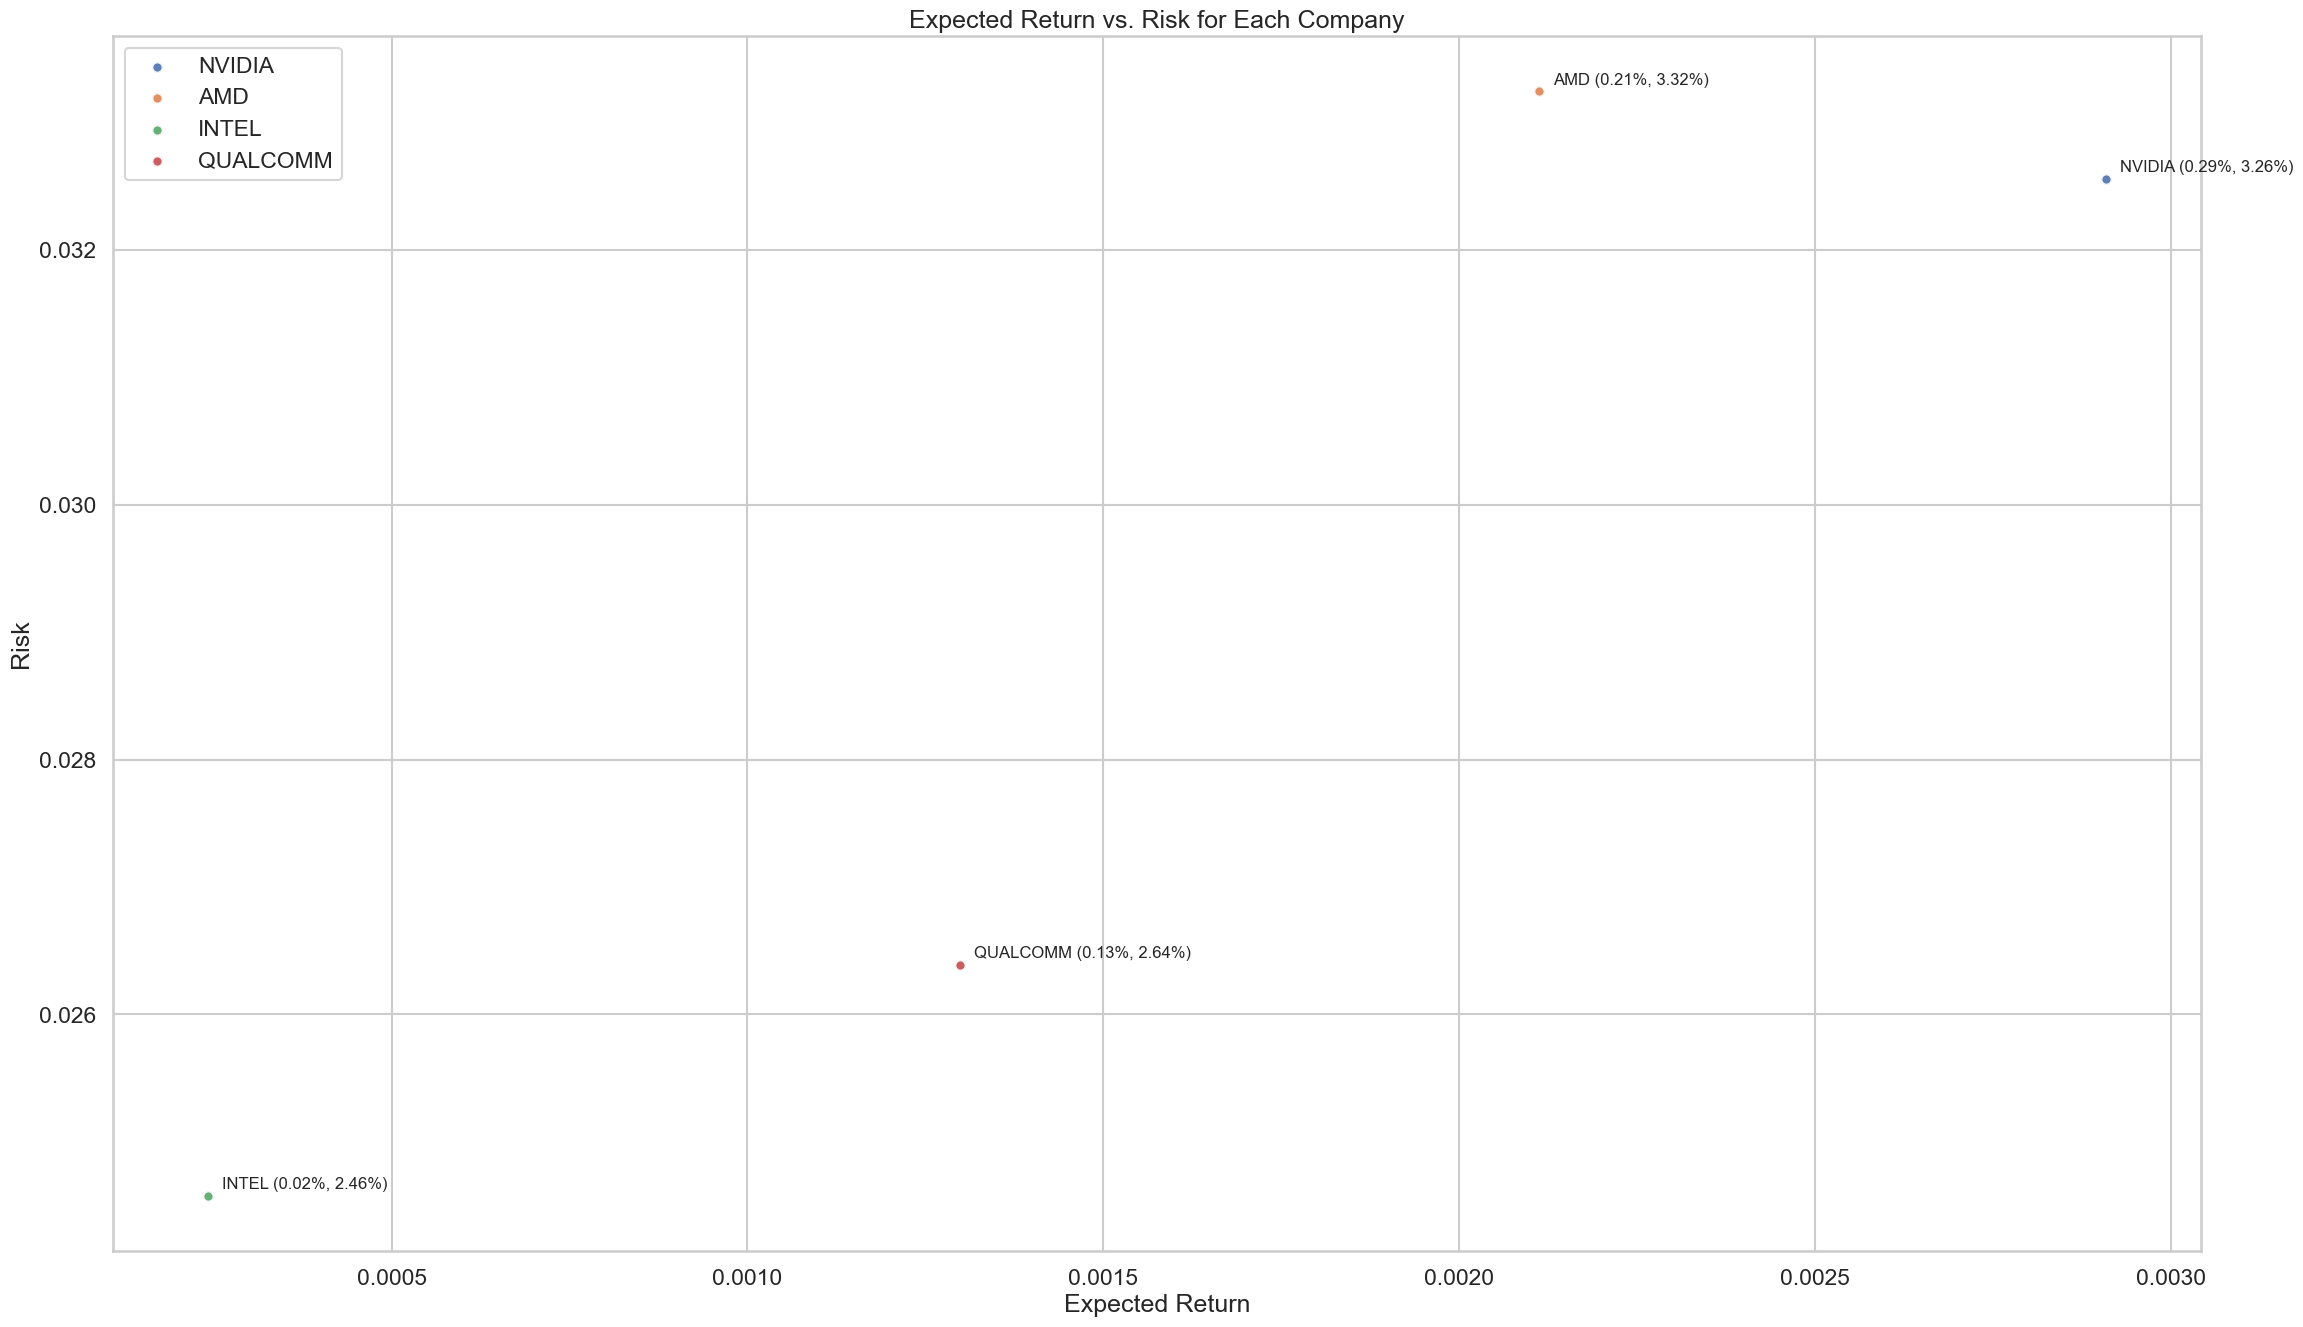

In [29]:
plt.figure(figsize=(24, 15))
area = np.pi * 20

# Iterate over each company name to calculate and plot their expected return and risk
for c_name in c_names:
    # Create a boolean mask for the current company
    mask = data['Company Name'] == c_name
    # Calculate the daily return and store it in a temporary variable instead of modifying the slice directly
    daily_return = data.loc[mask, 'Adj Close'].pct_change()
    # Now you can work with daily_return directly without modifying the original DataFrame
    mean_return = daily_return.mean()
    risk = daily_return.std()
    
    plt.scatter(mean_return, risk, s=area, label=c_name, alpha=0.9, linewidths=2, edgecolors='w')
    
    plt.annotate(f'{c_name} ({mean_return:.2%}, {risk:.2%})', 
        xy=(mean_return, risk), 
        xytext=(10, 5), 
        textcoords='offset points', 
        fontsize=12, 
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.title('Expected Return vs. Risk for Each Company')
plt.xlabel('Expected Return')
plt.ylabel('Risk')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()

#### Target Distribution

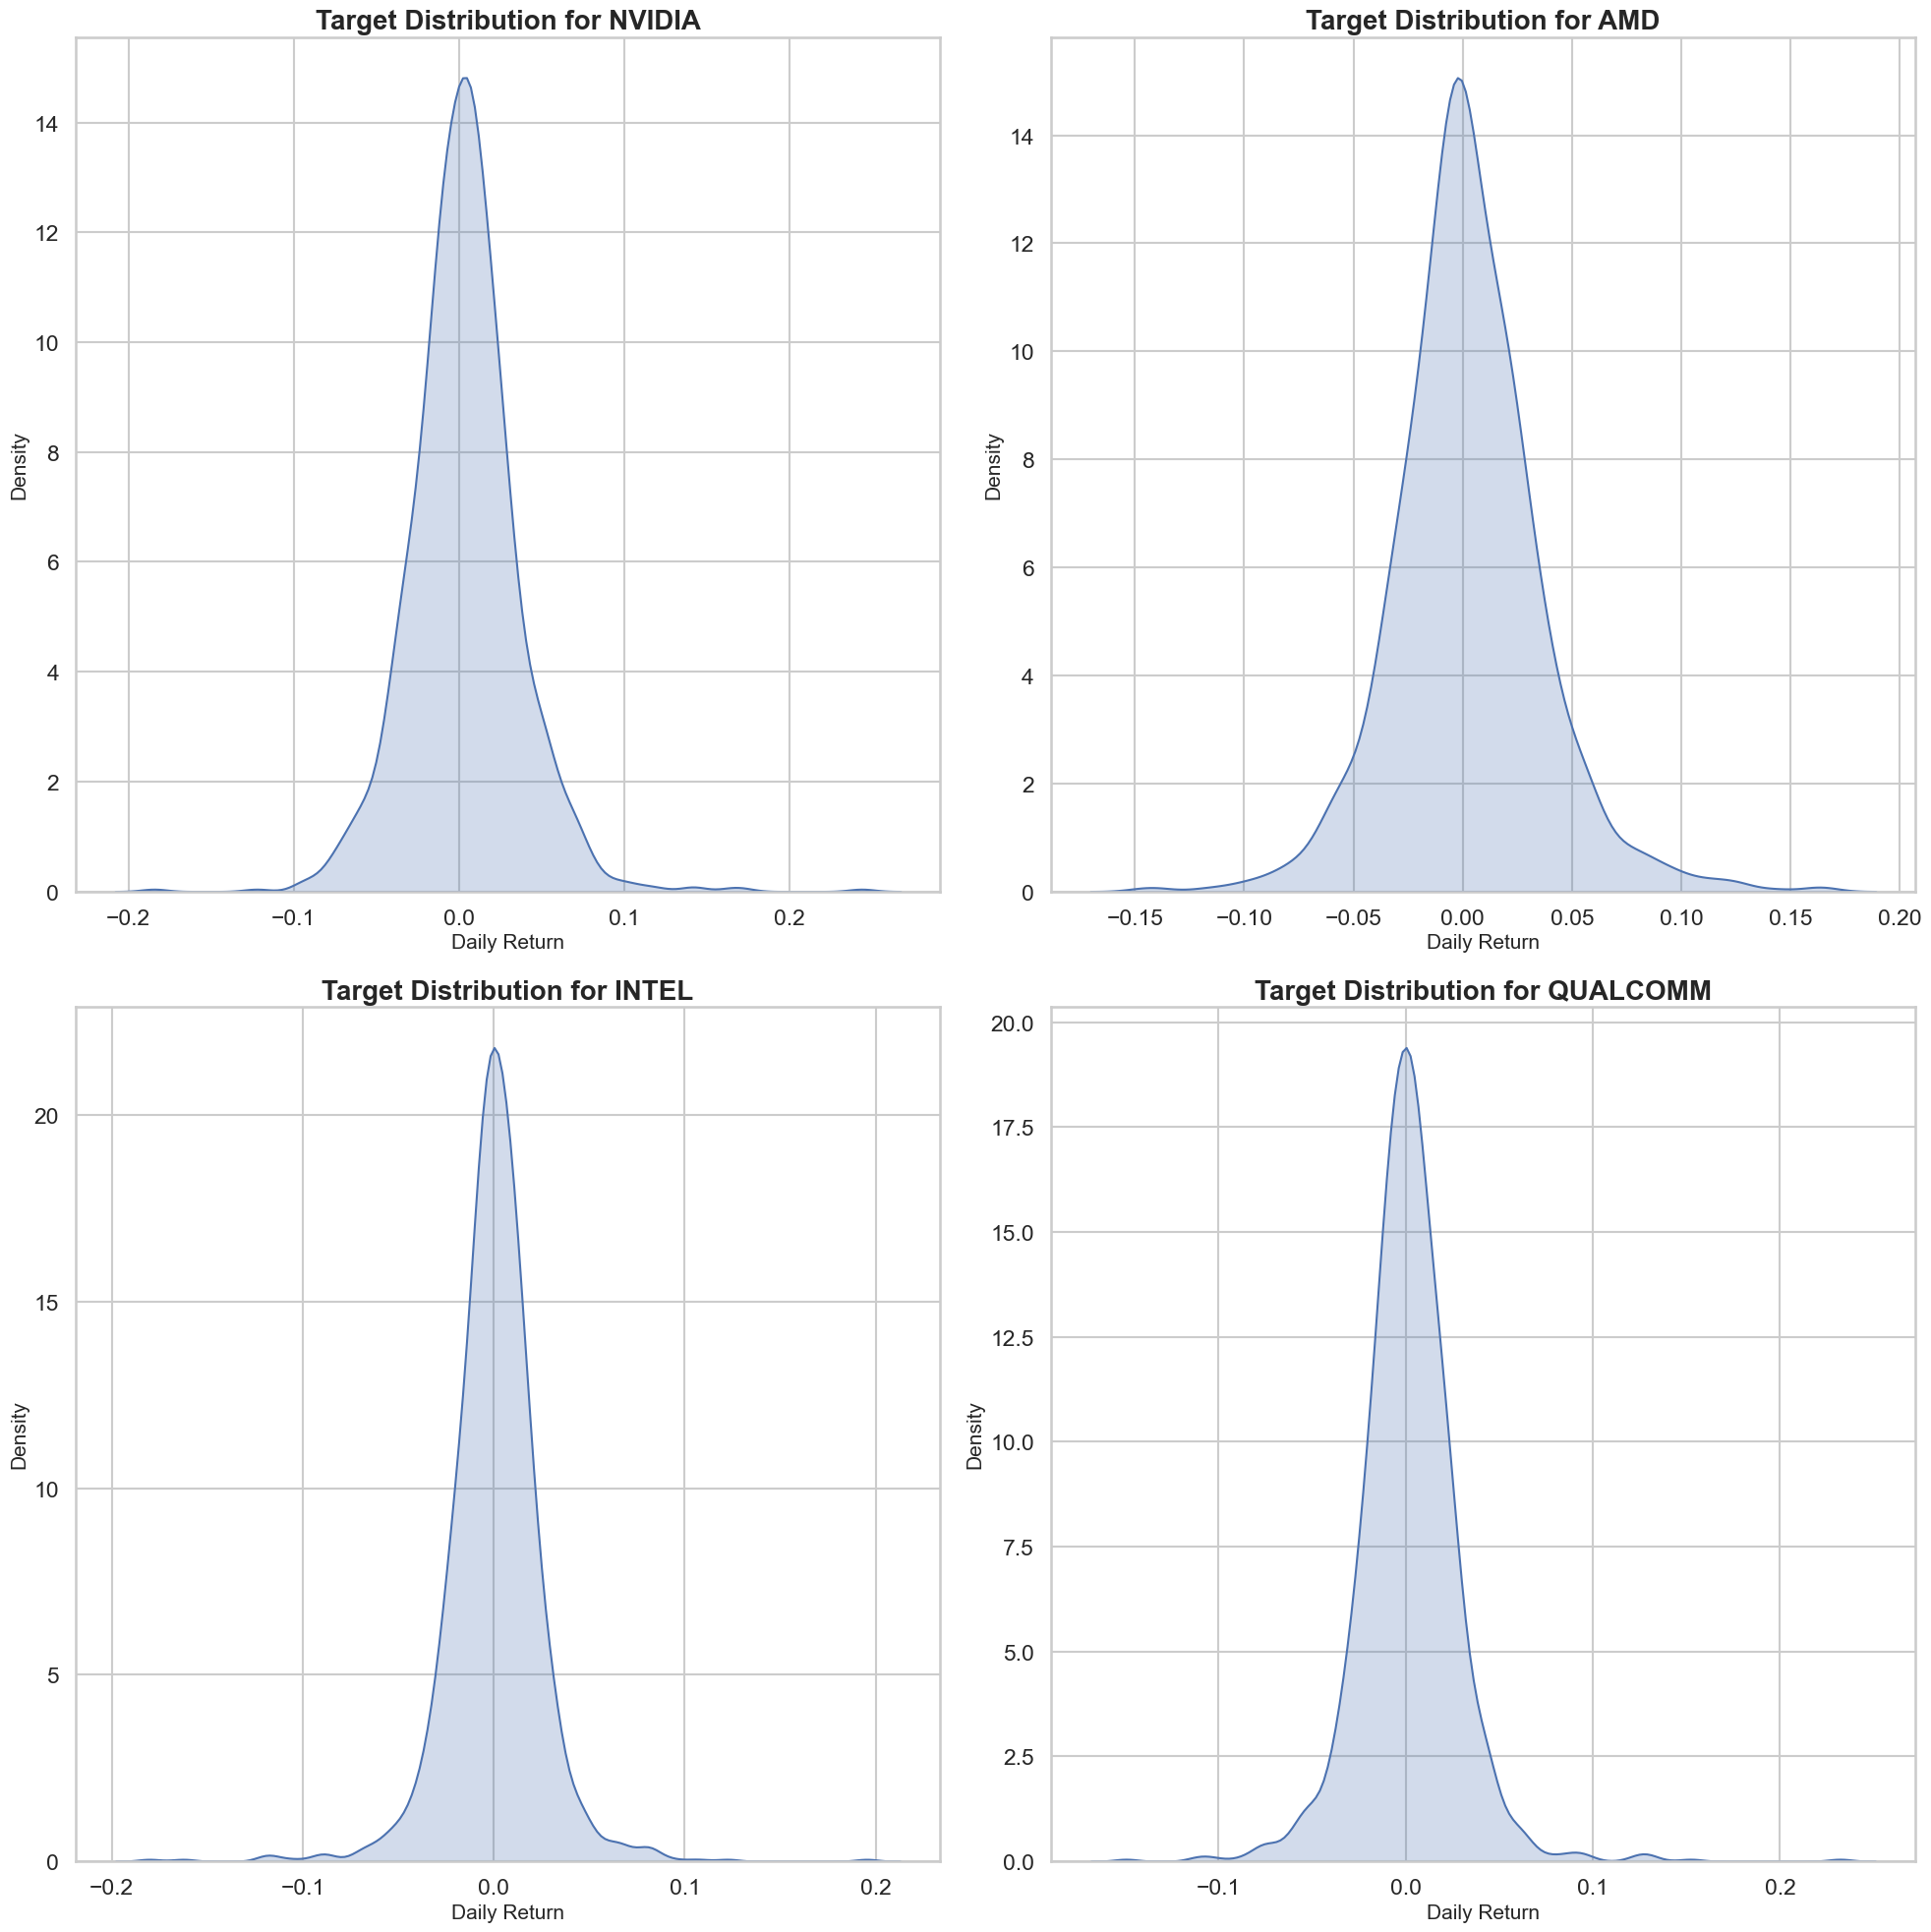

In [30]:
# Create a new figure with a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Loop through each stock in your list and plot its target distribution
for i, (stock_data, stock_name) in enumerate(zip(data_list, c_names)):
    # Calculate the target variable (e.g., daily returns) for the current stock
    daily_return = stock_data['Adj Close'].pct_change()
    
    # Plot the target distribution using a KDE plot on the appropriate subplot
    row, col = divmod(i, 2)  # Calculate the row and column indices of the subplot
    sns.kdeplot(daily_return.dropna(), fill=True, ax=axs[row, col])
    axs[row, col].set_title(f'Target Distribution for {stock_name}', weight='bold', fontsize=20)
    axs[row, col].set_xlabel('Daily Return', fontsize=15)
    axs[row, col].set_ylabel('Density', fontsize=15)

# Adjust layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

In [31]:
# mean_target = daily_return.mean()
# median_target = daily_return.median()
# std_target = daily_return.std()
# skewness_target = daily_return.skew()
# kurtosis_target = daily_return.kurtosis()

# print(f"Mean: {mean_target}")
# print(f"Median: {median_target}")
# print(f"Standard Deviation: {std_target}")
# print(f"Skewness: {skewness_target}")
# print(f"Kurtosis: {kurtosis_target}")

In [32]:
# Calculate statistics for each stock and print them
for stock_data, stock_name in zip(data_list, c_names):
    # Calculate target variable (e.g., daily returns) for the current stock
    daily_return = stock_data['Adj Close'].pct_change().dropna()
    
    # Compute statistics
    mean_target = daily_return.mean()
    median_target = daily_return.median()
    std_target = daily_return.std()
    skewness_target = daily_return.skew()
    kurtosis_target = daily_return.kurtosis()
    
    # Print the statistics for the current stock
    print(f"Target Distribution Statistics for {stock_name}:")
    print(f"Mean: {mean_target:.5f}")
    print(f"Median: {median_target:.5f}")
    print(f"Standard Deviation: {std_target:.5f}")
    print(f"Skewness: {skewness_target:.5f}")
    print(f"Kurtosis: {kurtosis_target:.5f}")
    print()

Target Distribution Statistics for NVIDIA:
Mean: 0.00291
Median: 0.00294
Standard Deviation: 0.03256
Skewness: 0.49750
Kurtosis: 4.75544

Target Distribution Statistics for AMD:
Mean: 0.00211
Median: 0.00048
Standard Deviation: 0.03325
Skewness: 0.33541
Kurtosis: 2.46142

Target Distribution Statistics for INTEL:
Mean: 0.00024
Median: 0.00042
Standard Deviation: 0.02458
Skewness: -0.25060
Kurtosis: 9.52262

Target Distribution Statistics for QUALCOMM:
Mean: 0.00130
Median: 0.00090
Standard Deviation: 0.02639
Skewness: 0.70234
Kurtosis: 8.46165



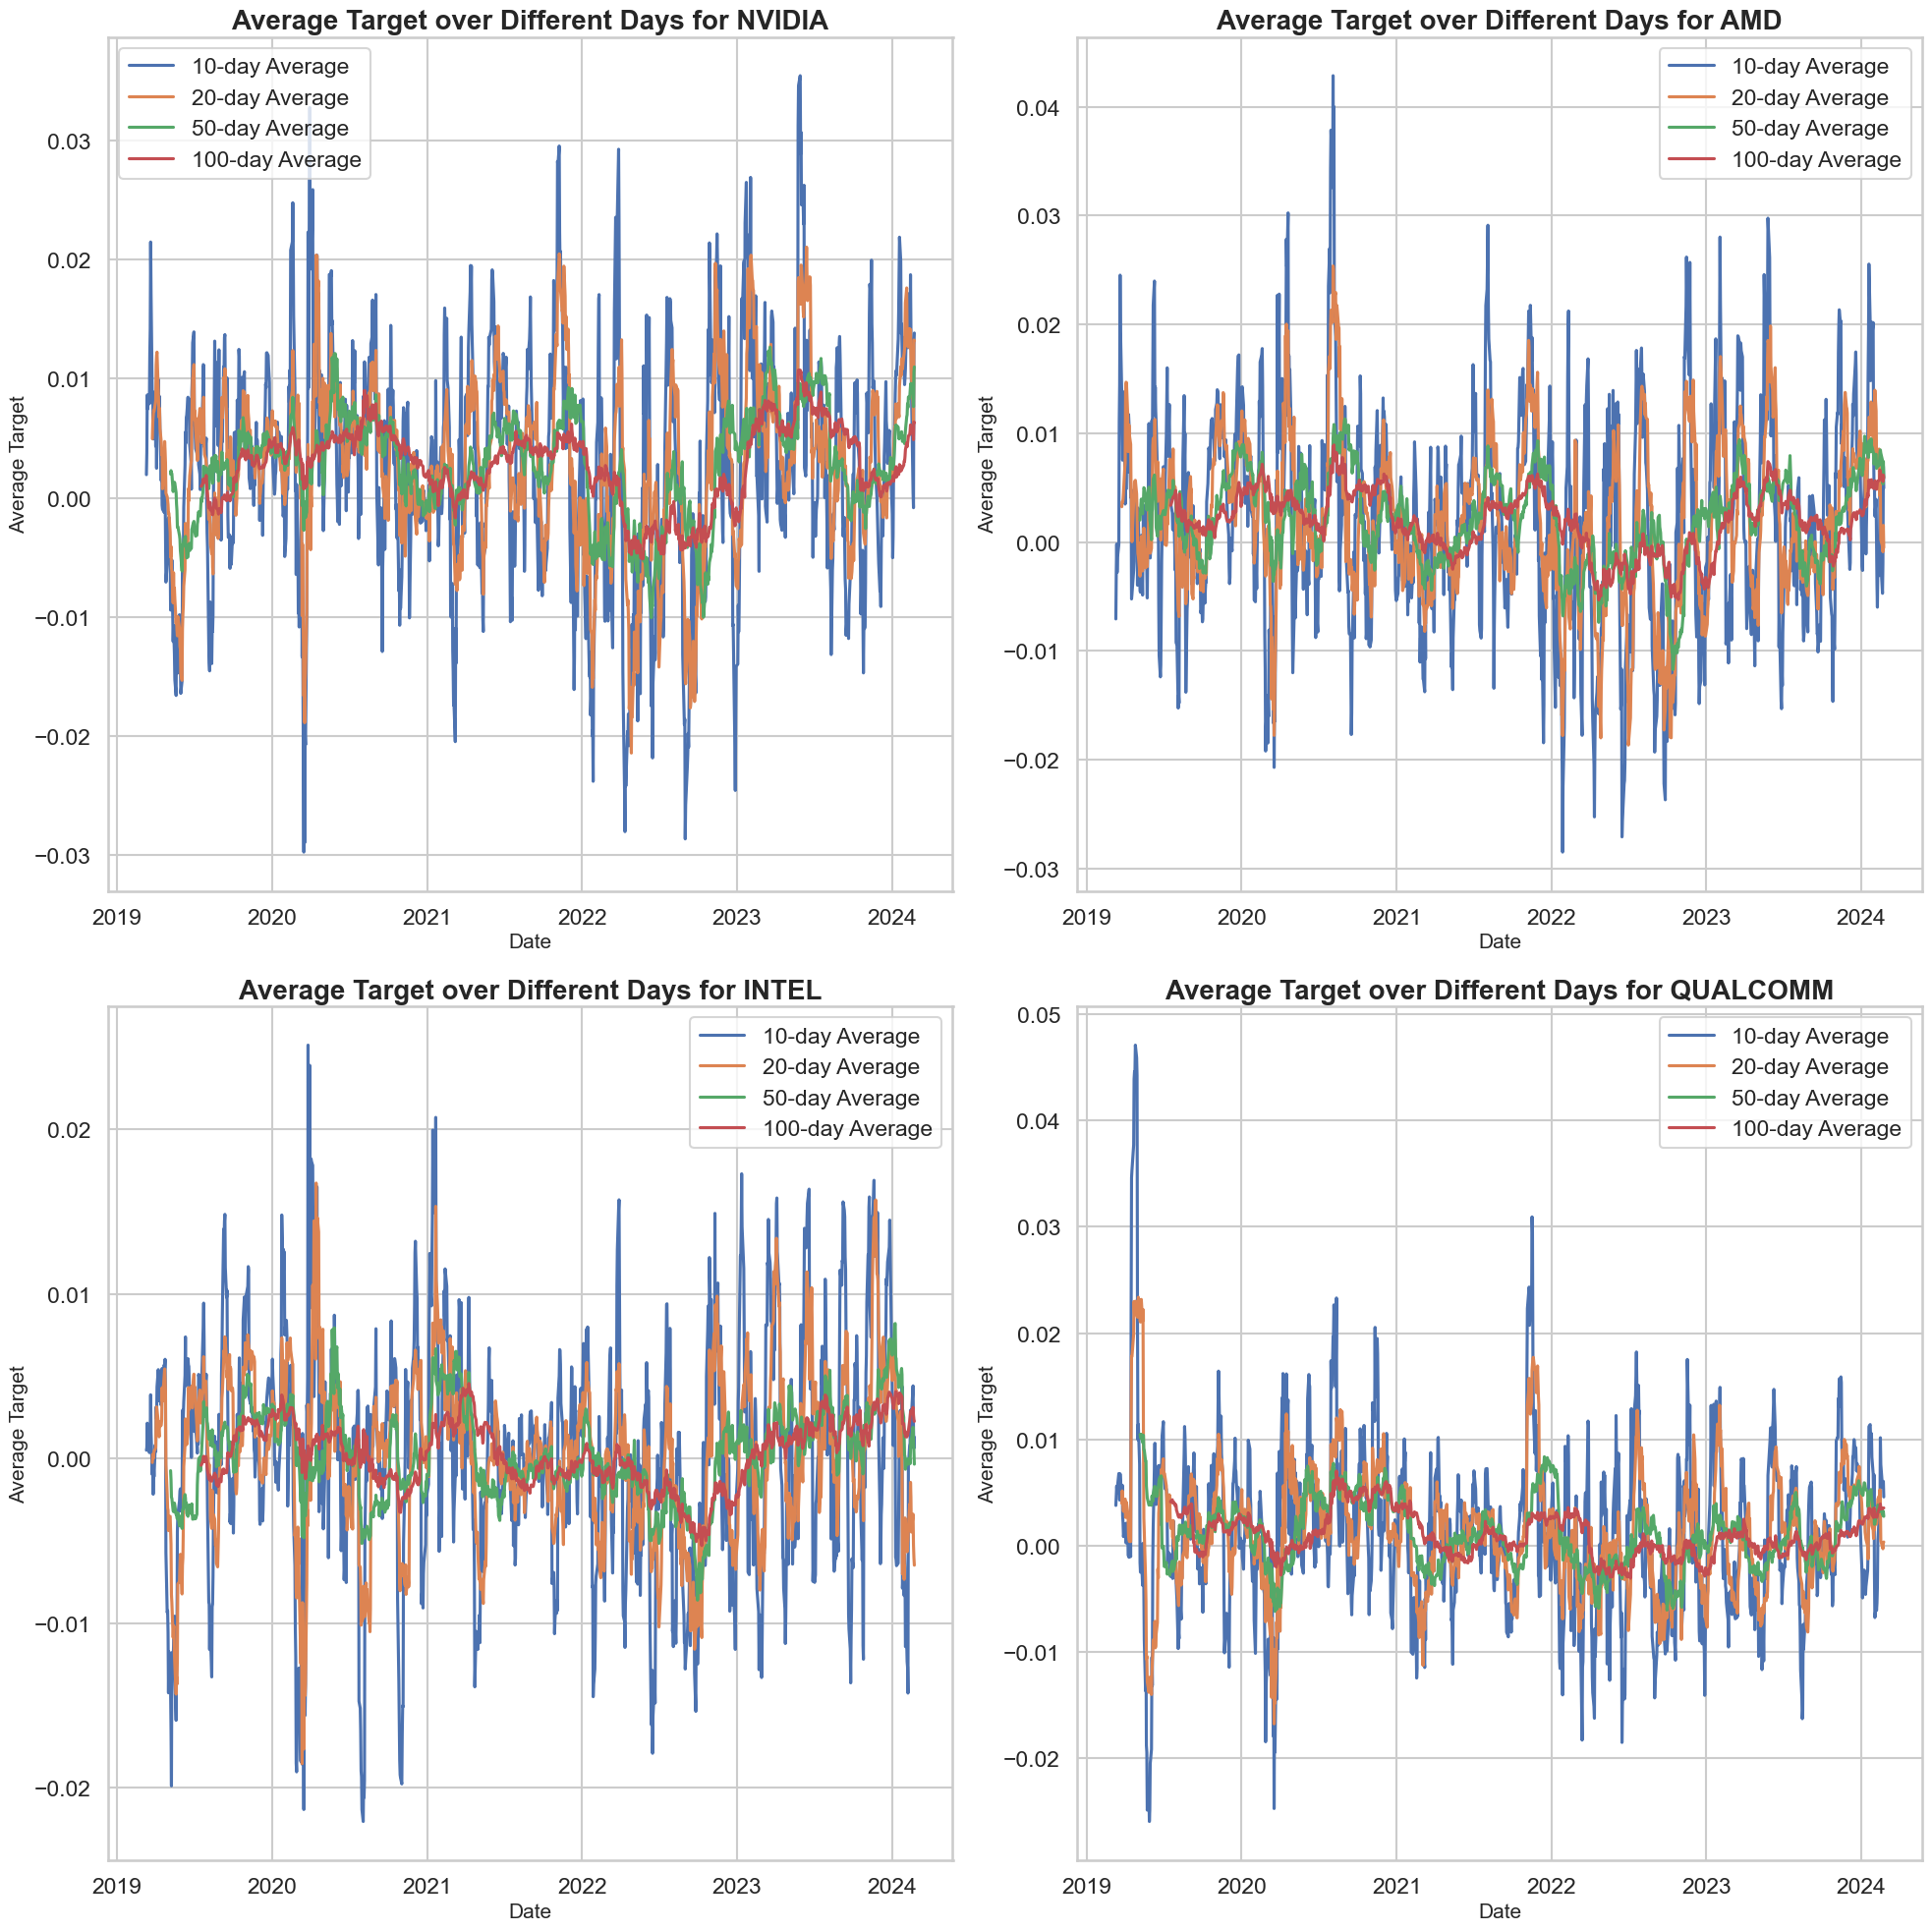

In [33]:
# Create a new figure with a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Define rolling windows for calculating the average target
rolling_windows = [10, 20, 50, 100]

# Loop through each stock in your list and plot its average target over different days
for i, (stock_data, stock_name) in enumerate(zip(data_list, c_names)):
    # Calculate the target variable (e.g., daily returns) for the current stock
    daily_return = stock_data['Adj Close'].pct_change()
    
    # Plot the average target over different days
    row, col = divmod(i, 2)  # Calculate the row and column indices of the subplot
    for window in rolling_windows:
        # Calculate the average target using a rolling window
        avg_target = daily_return.rolling(window).mean()
        
        # Plot the average target on the appropriate subplot
        axs[row, col].plot(avg_target, label=f'{window}-day Average')
        axs[row, col].set_title(f'Average Target over Different Days for {stock_name}', weight='bold', fontsize=20)
        axs[row, col].set_xlabel('Date', fontsize=15)
        axs[row, col].set_ylabel('Average Target', fontsize=15)
        axs[row, col].legend()

# Adjust layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


### Predictive Analysis


Models to use:
- LSTM
- RNN
- ARIMA
- XG Boost
- KNN
- GLM
- Regression

Getting and scaling data set for predictive model

In [34]:
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

df = pdr.get_data_yahoo('NVDA', start='2018-01-01', end=datetime.now())

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

[*********************100%***********************]  1 of 1 completed


array([[0.02388617],
       [0.0282225 ],
       [0.02859267],
       ...,
       [0.8500132 ],
       [0.9963115 ],
       [1.        ]])

Performing feature engineering

In [35]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.02388617, 0.0282225 , 0.02859267, 0.0291909 , 0.03137229,
       0.03135246, 0.03192755, 0.03205976, 0.03169619, 0.03074762,
       0.03227129, 0.03217874, 0.03405275, 0.03523599, 0.03696127,
       0.03593337, 0.03611515, 0.03842213, 0.03958554, 0.03822052,
       0.0392385 , 0.03748678, 0.0351798 , 0.02862903, 0.03255553,
       0.03361978, 0.02989159, 0.03470386, 0.03336528, 0.03488564,
       0.03779085, 0.03946986, 0.03859069, 0.04032258, 0.0378206 ,
       0.03803212, 0.03928146, 0.0394963 , 0.03932443, 0.03798255,
       0.03474683, 0.03617795, 0.03588379, 0.03803543, 0.03792967,
       0.03771153, 0.03908316, 0.04054733, 0.03986978, 0.04021021,
       0.04040851, 0.0407853 , 0.03765204, 0.04048784, 0.04015071,
       0.03793297, 0.03499802, 0.03880222, 0.0325357 , 0.03115746])]
[0.03454190802860501]

[array([0.02388617, 0.0282225 , 0.02859267, 0.0291909 , 0.03137229,
       0.03135246, 0.03192755, 0.03205976, 0.03169619, 0.03074762,
       0.03227129, 0.03217874, 0.03

(1409, 60, 1)

Building and training the sequential LSTM model

In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1409/1409 [==============================] - 16s 10ms/step - loss: 8.5173e-04


Testing the data set and find the root mean squared error

In [37]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3/3 [==============================] - 0s 8ms/step


68.26239124016504